In [241]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
notebook_dir = os.getcwd()
notebook_dir

'd:\\UAB\\COURSES\\1ST-FDS\\project\\Ecommerce-Segmentation\\notebooks'

In [243]:
project_root = os.path.dirname(notebook_dir)
project_root

'd:\\UAB\\COURSES\\1ST-FDS\\project\\Ecommerce-Segmentation'

In [244]:
dataset_path = os.path.join(project_root, 'data','raw','marketing_campaign.csv')
dataset_path

'd:\\UAB\\COURSES\\1ST-FDS\\project\\Ecommerce-Segmentation\\data\\raw\\marketing_campaign.csv'

In [245]:
df = pd.read_csv(dataset_path,sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 1. General overview

In [246]:
df.shape

(2240, 29)

In [247]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [248]:
# Count missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [249]:
# Count duplicated values
df.duplicated().sum()

np.int64(0)

In [250]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## 2. Univariate analysis
Understand each feature individually

In [251]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Numeric features

In [252]:
# 2014-06-29: The latest date in dataset, so we use 2014
df['Age'] = 2014 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,33


<Axes: xlabel='Kidhome', ylabel='count'>

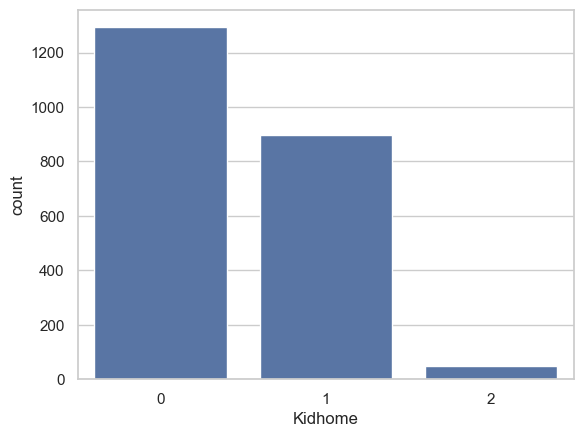

In [253]:
sns.countplot(data=df,x='Kidhome')

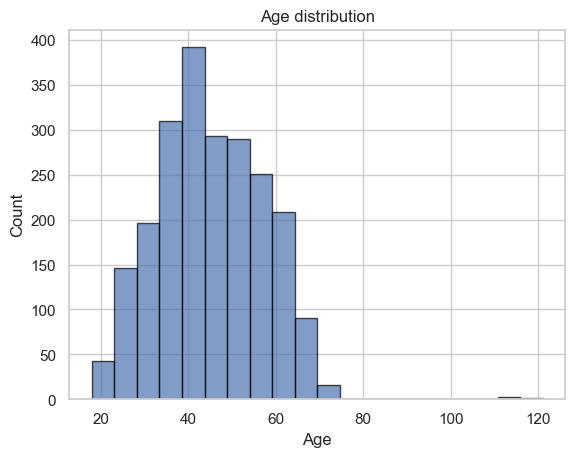

In [254]:
plt.hist(df['Age'],bins=20, edgecolor='black', alpha=0.7)
# sns.countplot(df,x='Age', native_scale=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


<Axes: xlabel='Income', ylabel='Count'>

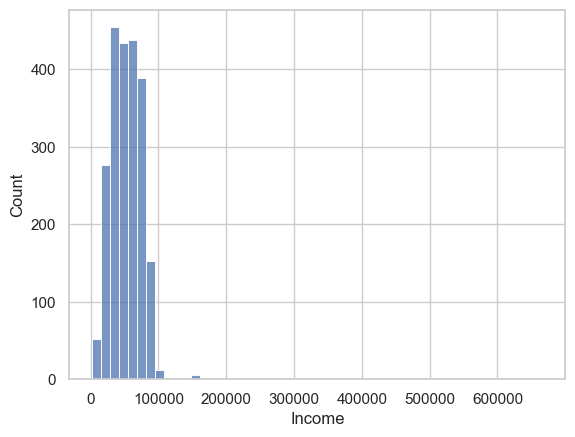

In [255]:
# Histogram for Income
print(df['Income'].describe())
sns.histplot(x=df['Income'],bins=50)

In [256]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### Categorical features

In [257]:
print(df['Education'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [258]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


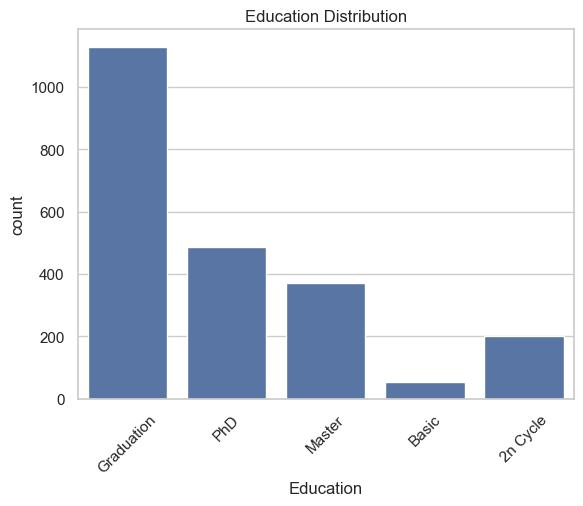

In [259]:
# Bar plot
sns.countplot(df,x='Education')
plt.title("Education Distribution")
plt.xticks(rotation=45)
plt.show()

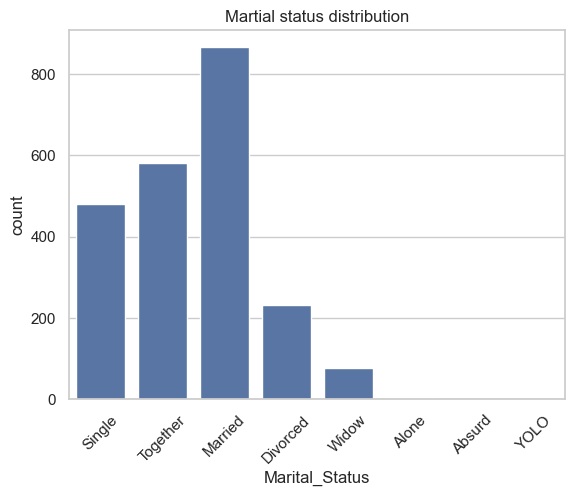

In [260]:
sns.countplot(df,x='Marital_Status')
plt.title("Martial status distribution")
plt.xticks(rotation=45)
plt.show()

## 3. Bivariate/ Multivariate analysis

#### Correlation matrix between specific columns


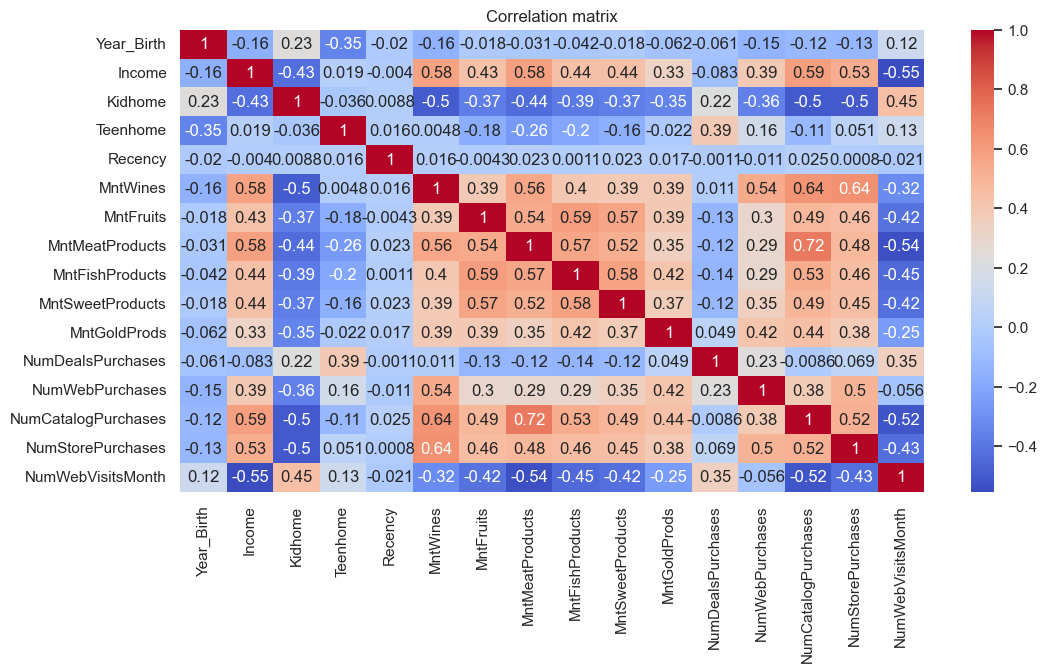

In [261]:
corr_selected_cols = ['Year_Birth', 'Education','Marital_Status','Income','Kidhome','Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize=(12,6))
sns.heatmap(df[corr_selected_cols].corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

#### Observation from the correlation matrix above
1. Strong positive correlation (>= 0.5):
- MntWines (0.58), MntMeatProducts (0.58), NumCatalogPurchases (0.59), and NumStorePurchases (0.53).

- MntMeatProducts is highly correlated with NumCatalogPurchases (0.72) and MntWines (0.56).

- NumCatalogPurchases is strongly linked to MntWines (0.64) and NumStorePurchases (0.52)
2. Strong negative correlation (<= -0.5):
- Income is negatively correlated with NumWebVisitsMonth (-0.55) (higher income → fewer web visits).

- Kidhome and Teenhome reduce spending:

  + Kidhome negatively impacts MntWines (-0.5), NumCatalogPurchases (-0.5), and NumStorePurchases (-0.5).

  + Teenhome has weaker but notable negative effects on MntMeatProducts (-0.26).

3. Conclusion & recommendations
- Target High-Income Customers for premium products (wine, meat) and catalog promotions.
- Big spenders prefer stores rather than websites

... and more

<Axes: >

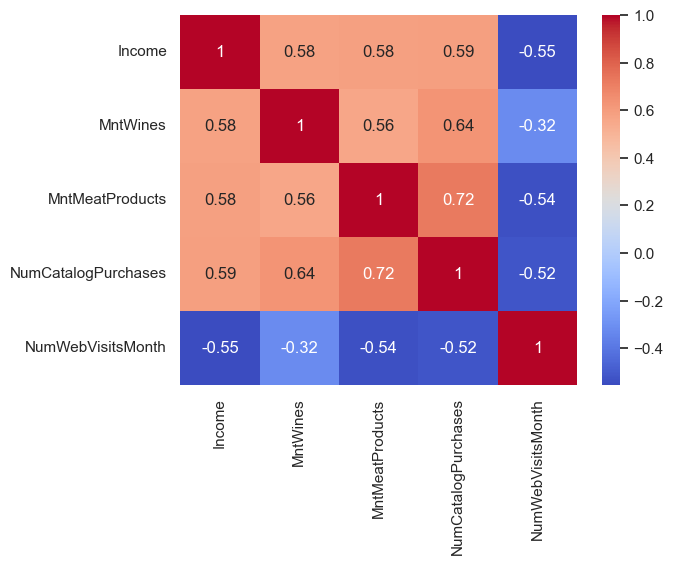

In [262]:
# Zoom in income and some spending variables
focus_columns = ['Income', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumWebVisitsMonth']
sns.heatmap(df[focus_columns].corr(), annot=True, cmap='coolwarm')

#### Income vs Meat Spending

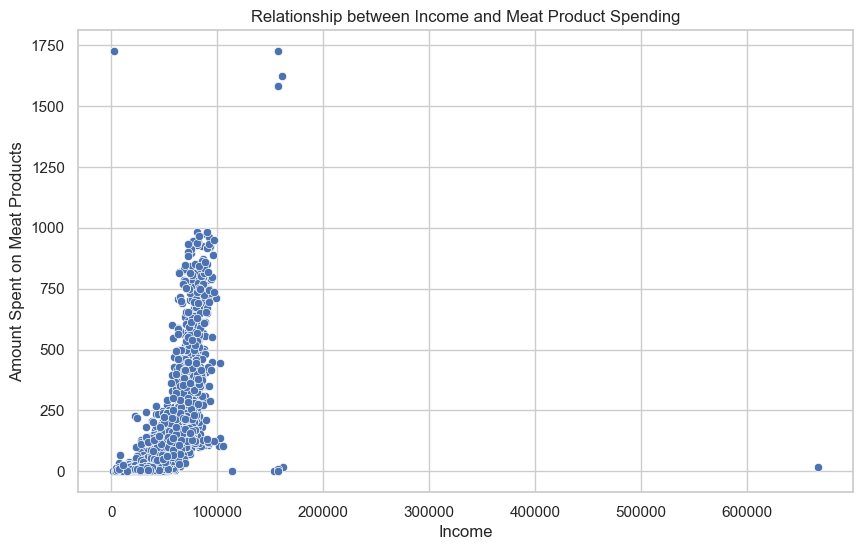

In [263]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Income',y='MntMeatProducts')
plt.title("Relationship between Income and Meat Product Spending")
plt.ylabel("Amount Spent on Meat Products")
plt.show()

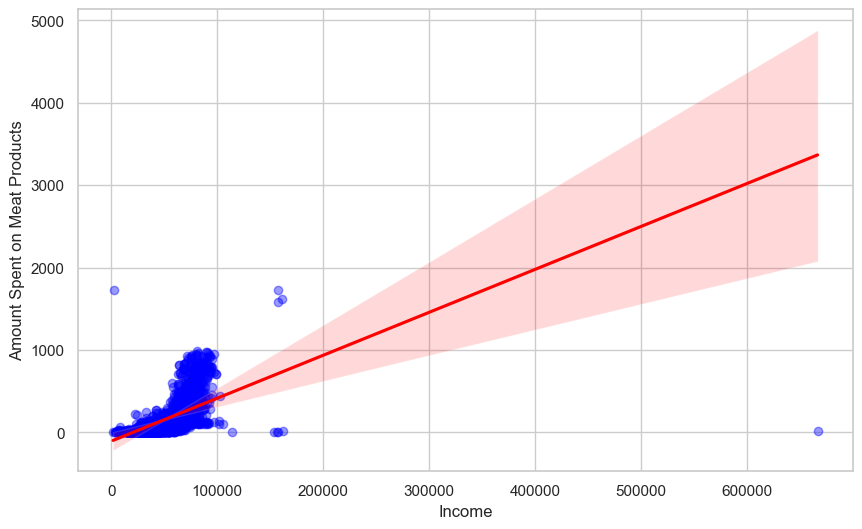

In [264]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.regplot(df, x='Income',y='MntMeatProducts',
            scatter_kws={"alpha": 0.4, "color": "blue"}, # Transparency to avoid overplotting
             line_kws={"color": "red"}  # Regression line color
            )
plt.ylabel("Amount Spent on Meat Products")
plt.show()

#### Education (categorical) vs Wine spending (numerical)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9400\673179120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Education',y='MntWines',


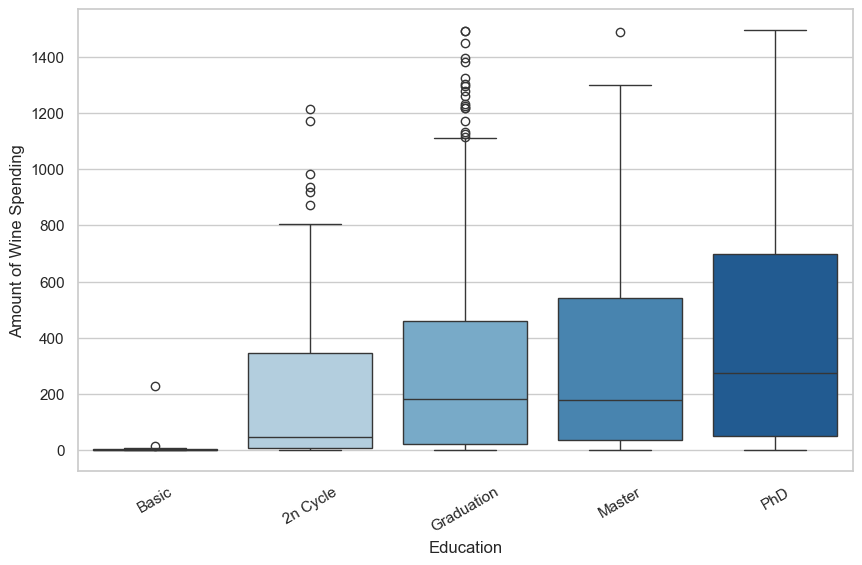

In [265]:
# Use boxplot to visualize these two different data-type cols

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Education',y='MntWines',
        palette="Blues",
    order=["Basic", "2n Cycle", "Graduation", "Master", "PhD"]    
            )
plt.ylabel('Amount of Wine Spending')
plt.xticks(rotation=30)
plt.show()

In [266]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [267]:
# View the "Basic" to know why it's too low compare to others
df[df['Education']=='Basic']['MntWines'].describe()

count     54.000000
mean       7.240741
std       30.763207
min        0.000000
25%        1.000000
50%        2.000000
75%        4.750000
max      228.000000
Name: MntWines, dtype: float64

#### Age vs Total Spending

In [268]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Create a new column "Total_Spending"
df['Total_Spending'] = df[spending_cols].sum(axis=1)

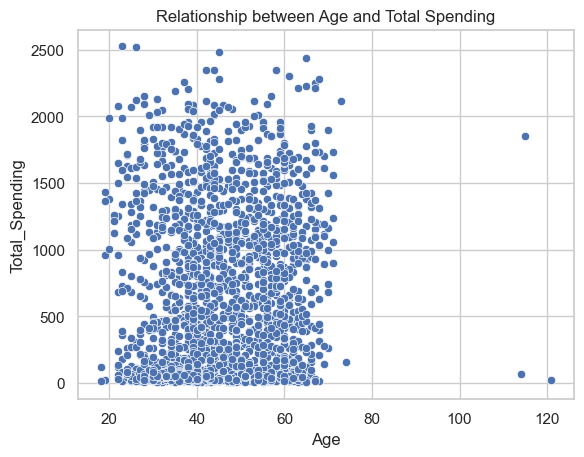

In [269]:
sns.scatterplot(data=df,x='Age',y='Total_Spending')
plt.title('Relationship between Age and Total Spending')
plt.show()

## 4. Group-wise analysis

#### Total kids and spending

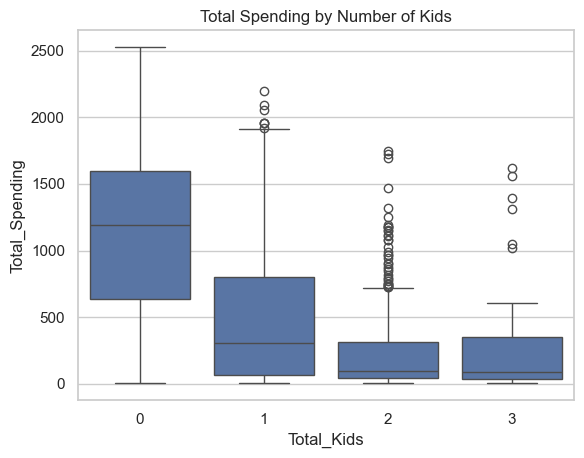

In [270]:
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']
sns.boxplot(x='Total_Kids', y='Total_Spending', data=df)
plt.title("Total Spending by Number of Kids")
plt.show()

#### Customer tenure

In [271]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['Customer_Since_Years'] = 2014 - df['Dt_Customer'].dt.year
df['Customer_Since_Years'].head()

0    2
1    0
2    1
3    0
4    0
Name: Customer_Since_Years, dtype: int32

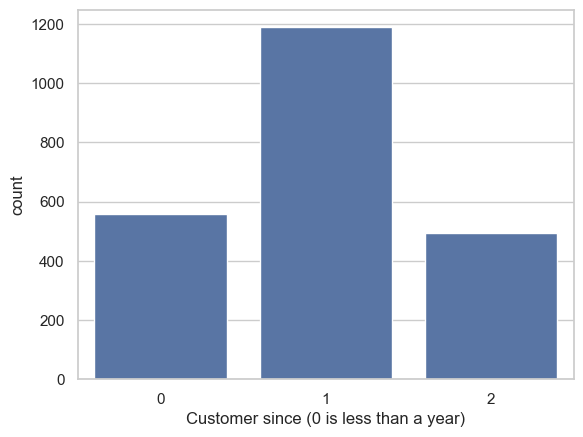

In [272]:
# sns.histplot(df['Customer_Since_Years'],bins=5)
sns.countplot(data=df,x='Customer_Since_Years')
plt.xlabel("Customer since (0 is less than a year)")
plt.show()

## 5. Data quality checks

In [273]:
# Missing vluaes
df.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Total_Spending           0
Total_Kids               0
Customer_Since_Years     0
dtype: int64

In [274]:
# missing percentages
(df.isnull().mean()*100).round(2)

ID                      0.00
Year_Birth              0.00
Education               0.00
Marital_Status          0.00
Income                  1.07
Kidhome                 0.00
Teenhome                0.00
Dt_Customer             0.00
Recency                 0.00
MntWines                0.00
MntFruits               0.00
MntMeatProducts         0.00
MntFishProducts         0.00
MntSweetProducts        0.00
MntGoldProds            0.00
NumDealsPurchases       0.00
NumWebPurchases         0.00
NumCatalogPurchases     0.00
NumStorePurchases       0.00
NumWebVisitsMonth       0.00
AcceptedCmp3            0.00
AcceptedCmp4            0.00
AcceptedCmp5            0.00
AcceptedCmp1            0.00
AcceptedCmp2            0.00
Complain                0.00
Z_CostContact           0.00
Z_Revenue               0.00
Response                0.00
Age                     0.00
Total_Spending          0.00
Total_Kids              0.00
Customer_Since_Years    0.00
dtype: float64

####  Invalid / Inconsistent Categorical Values
May be typos or inconsistent labels in categorical columns


In [275]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [276]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

#### Outlier detection

In [277]:
# Use IQR
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)    
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR ) | (df[col] < Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

ID: 2240 outliers
Year_Birth: 2240 outliers
Income: 2208 outliers
Kidhome: 2240 outliers
Teenhome: 2240 outliers
Recency: 2240 outliers
MntWines: 2205 outliers
MntFruits: 2007 outliers
MntMeatProducts: 2065 outliers
MntFishProducts: 2017 outliers
MntSweetProducts: 1990 outliers
MntGoldProds: 2033 outliers
NumDealsPurchases: 2093 outliers
NumWebPurchases: 2236 outliers
NumCatalogPurchases: 2169 outliers
NumStorePurchases: 2240 outliers
NumWebVisitsMonth: 2231 outliers
AcceptedCmp3: 0 outliers
AcceptedCmp4: 0 outliers
AcceptedCmp5: 0 outliers
AcceptedCmp1: 0 outliers
AcceptedCmp2: 0 outliers
Complain: 0 outliers
Z_CostContact: 0 outliers
Z_Revenue: 0 outliers
Response: 0 outliers
Age: 2237 outliers
Total_Spending: 2237 outliers
Total_Kids: 2187 outliers
Customer_Since_Years: 557 outliers


The columns data types are not good choices, we need to preprocess them

#### Constant columns
(same value for all rows)

In [278]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant Columns:", constant_cols)

Constant Columns: ['Z_CostContact', 'Z_Revenue']


#### Highly imbalanced columns

In [279]:
# Categorical (object-type) columns
# relative frequency distribution (normalized value counts) 
for col in df.select_dtypes(include=['object']):
    print( df[col].value_counts(normalize=True).round(2), "\n")

Education
Graduation    0.50
PhD           0.22
Master        0.17
2n Cycle      0.09
Basic         0.02
Name: proportion, dtype: float64 

Marital_Status
Married     0.39
Together    0.26
Single      0.21
Divorced    0.10
Widow       0.03
Alone       0.00
Absurd      0.00
YOLO        0.00
Name: proportion, dtype: float64 



In [280]:
# Check for mixed types in object columns
for col in df.select_dtypes(include='object'):
    unique_types = df[col].map(type).nunique()
    if unique_types > 1:
        print(f"Column '{col}' has mixed types.")


## 6. Domain specific insights

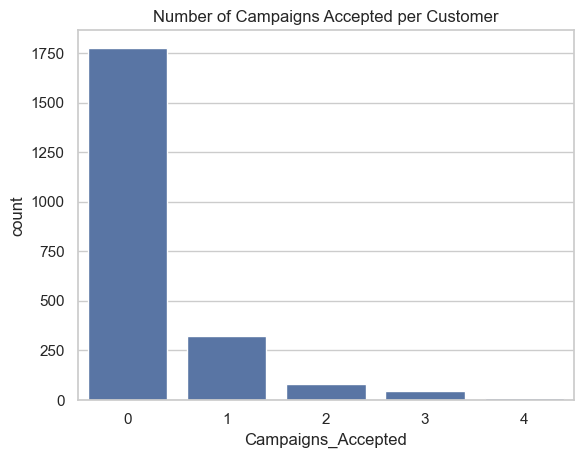

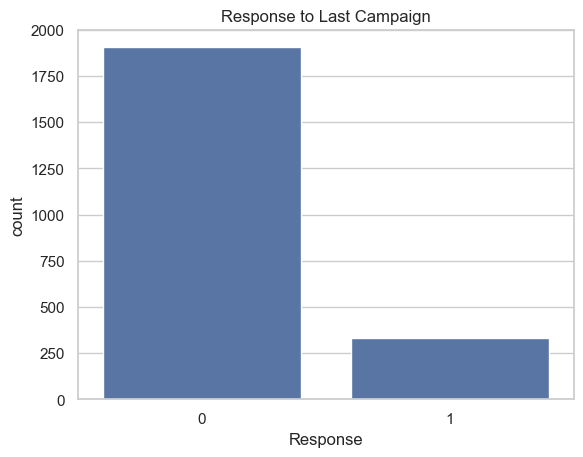

In [281]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)

sns.countplot(x='Campaigns_Accepted', data=df)
plt.title("Number of Campaigns Accepted per Customer")
plt.show()

# Response Rate
sns.countplot(x='Response', data=df)
plt.title("Response to Last Campaign")
plt.show()